## Matthew Patrolia
# Assignment 3: Autoregressive Moving Average Models

Tasks associated with this assignment are:
1. Load your dataset that
2. Split dataset into training and test dataset
3. Fit the parameters of the following models to your dataset:
    * AR (2)
    * ARMA(2,2)
4. Using the test portion of the dataset, compare the observations, AR(2) and ARMA(2,2) predictions for the follwing lead times:
    * 1 time period ahead
    * 3 time periods ahead
    * 5 time periods ahead
5. Characterize on the accuracy of the forecasts for each lead time and model (scatterplots, R^2, RMSE)
6. Comment on and contrast modeling approaches. 

## 1. Import Libraries and Load Data

In [26]:
import pandas as pd  #import libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from pandas.core import datetools

df= pd.read_pickle('Bastrop_WY2011-2017.pkl') #load .pkl from Assignment 1

WY= np.zeros(len(df['Y'].index))  #create an empty array that is full of zeros and equal to the number of days in the record

WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10] #for the records where the month is earlier than October 1, the water year is correct

WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10]+1 #for the records where the date is after October 1, water year is one more than the calendar year

df['WY'] = WY.astype(int) #save the water year as a column in the pandas data frame as an integer

qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)]) #print the first and last 10 records to make sure that the data is correct
df.iloc[qrows,:]


,Y,M,D,H,water_level(blsd),SerDates,WY
0,2010,10,1,0,216.49,2010-10-01 00:00:00,2011
1,2010,10,1,12,217.32,2010-10-01 12:00:00,2011
2,2010,10,2,0,216.78,2010-10-02 00:00:00,2011
3,2010,10,2,12,216.53,2010-10-02 12:00:00,2011
4,2010,10,3,0,216.32,2010-10-03 00:00:00,2011
5,2010,10,3,12,216.19,2010-10-03 12:00:00,2011
6,2010,10,4,0,216.05,2010-10-04 00:00:00,2011
7,2010,10,4,12,215.94,2010-10-04 12:00:00,2011
8,2010,10,5,0,215.81,2010-10-05 00:00:00,2011
9,2010,10,5,12,215.73,2010-10-05 12:00:00,2011


## 2. Split the dataframe into a training and a test portion


In [27]:
df_train = df[df.WY !=2017] #create training data equal to every year prior to 2017
df_test = df[df.WY ==2017] #creat the test data equal to the 2017 water year

## AR(2) Model 1 Time Step Ahead

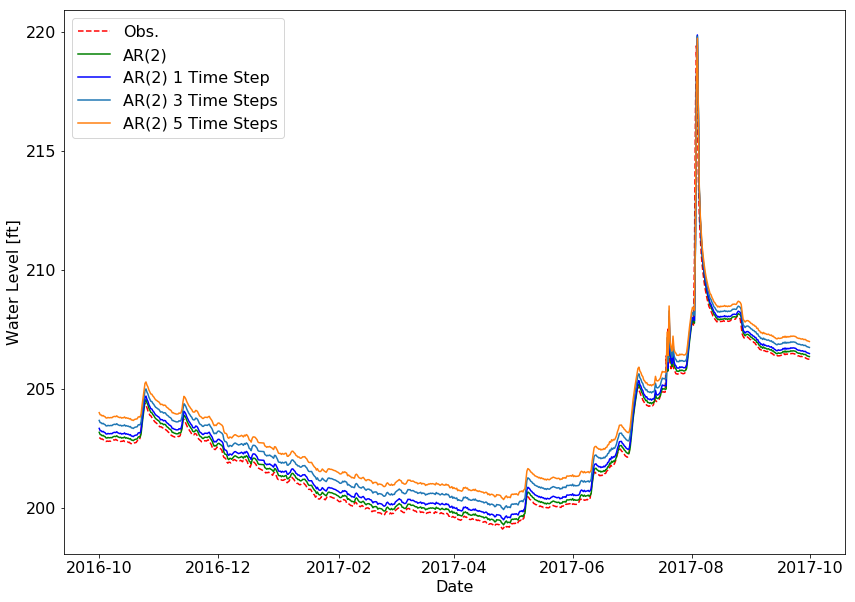

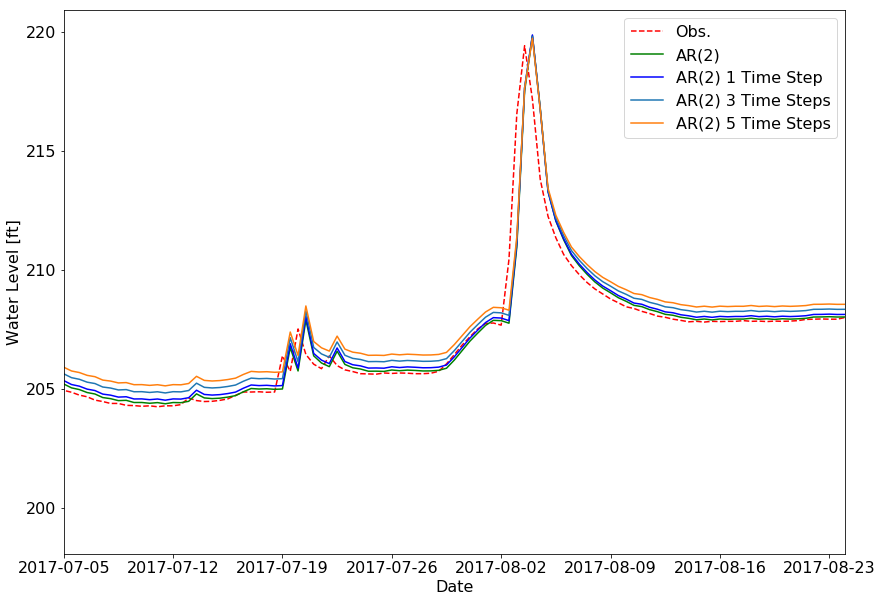

In [28]:
WL = df['water_level(blsd)'].values
WLt = pd.Series(df_train['water_level(blsd)'].values, df_train['SerDates'].values)
WLtrain = df_train['water_level(blsd)'].values #creating WLtrain array
WLtest = df_test['water_level(blsd)'].values #creating WLtest array

DatesTest = df_test['SerDates'].values

#Compute mu, phi_1, and phi_2 for AR(2) Model
WL_AR2_model = sm.AR(WLt).fit(2) #compute AR(2) phi values using statsmodel

WLttm1 = np.concatenate([WLtrain[-2:-1],WLtest[0:-1]]) 
WLttm2 = np.concatenate([WLtrain[-3:-1],WLtest[0:-2]])


AR2_mu = WL_AR2_model.params[0]
AR2_phi1 = WL_AR2_model.params[1]
AR2_phi2 = WL_AR2_model.params[2]

#Compute AR(2) Model for dataset
WLhatAR2 = AR2_mu + AR2_phi1*WLttm1 + AR2_phi2*WLttm2

#Compute AR(2) at one time step ahead
WLhatAR2tp1 = AR2_mu + AR2_phi1*WLhatAR2 + AR2_phi2*WLttm1

#Compute AR(2) at two time steps ahead
WLhatAR2tp2 = AR2_mu + AR2_phi1*WLhatAR2tp1 + AR2_phi2*WLhatAR2

#Compute AR(2) at three time steps ahead
WLhatAR2tp3 = AR2_mu + AR2_phi1*WLhatAR2tp2 + AR2_phi2*WLhatAR2tp1

#Compute AR(2) at four time steps ahead
WLhatAR2tp4 = AR2_mu + AR2_phi1*WLhatAR2tp3 + AR2_phi2*WLhatAR2tp2

#Compute AR(2) at five time steps ahead
WLhatAR2tp5 = AR2_mu + AR2_phi1*WLhatAR2tp4 + AR2_phi2*WLhatAR2tp3

#Plot AR(2) Model
plt.figure(figsize=(14,10)) #plot commands

plt.plot(DatesTest,WLtest,'r--')
plt.plot(DatesTest,WLhatAR2,'g-')
plt.plot(DatesTest, WLhatAR2tp1, 'b-')
plt.plot(DatesTest, WLhatAR2tp3)
plt.plot(DatesTest, WLhatAR2tp5)
plt.ylabel('Water Level [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('Obs.','AR(2)','AR(2) 1 Time Step','AR(2) 3 Time Steps','AR(2) 5 Time Steps'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show() #show plot

plt.figure(figsize=(14,10))   #plot commands
plt.plot(DatesTest,WLtest,'r--')
plt.plot(DatesTest,WLhatAR2,'g-')
plt.plot(DatesTest, WLhatAR2tp1, 'b-')
plt.plot(DatesTest, WLhatAR2tp3)
plt.plot(DatesTest, WLhatAR2tp5)
plt.xlim([DatesTest[550],DatesTest[650]])
plt.ylabel('Water Level [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('Obs.','AR(2)','AR(2) 1 Time Step','AR(2) 3 Time Steps','AR(2) 5 Time Steps'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show() #show plot

# Compare Predictions with Observations 


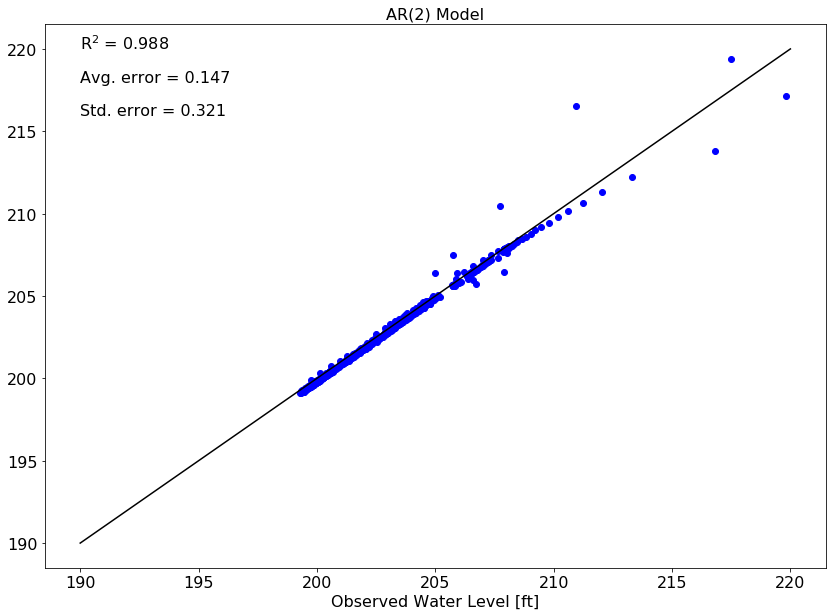

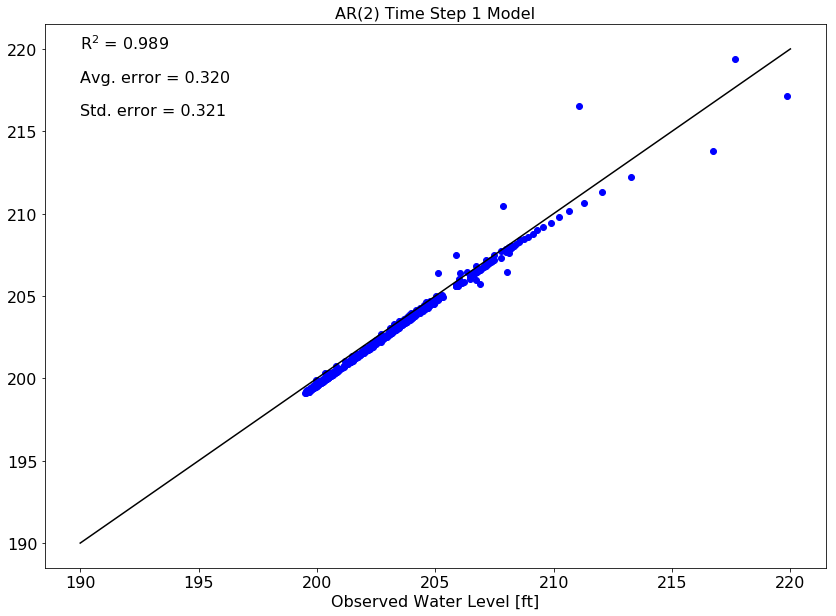

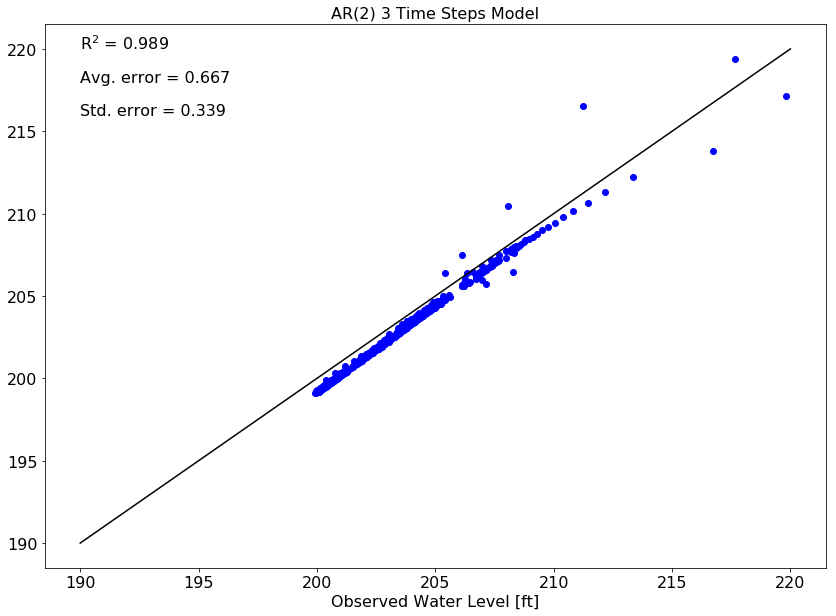

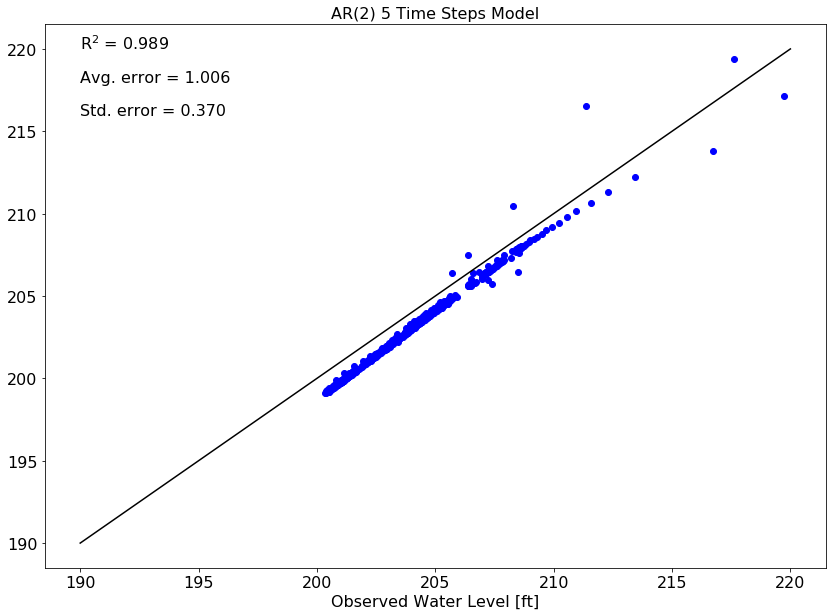

In [29]:
#compute R^2 values for each prediction

#Zero time Steps
R2AR2 = np.corrcoef(WLhatAR2, WLtest)**2
muAR2 = np.mean(WLhatAR2-WLtest)
stdAR2 = np.std(WLhatAR2-WLtest)

# 1 Time Step
R2AR2t1 = np.corrcoef(WLhatAR2tp1, WLtest)**2
muAR2t1 = np.mean(WLhatAR2tp1-WLtest)
stdAR2t1 = np.std(WLhatAR2tp1-WLtest)

# 3 Time Steps
R2AR2t3 = np.corrcoef(WLhatAR2tp3, WLtest)**2
muAR2t3 = np.mean(WLhatAR2tp3-WLtest)
stdAR2t3 = np.std(WLhatAR2tp3-WLtest)

# 5 Time Steps
R2AR2t5 = np.corrcoef(WLhatAR2tp5, WLtest)**2
muAR2t5 = np.mean(WLhatAR2tp5-WLtest)
stdAR2t5 = np.std(WLhatAR2tp5-WLtest)


# Plot theAR(2) model results
plt.figure(figsize=(14,10))

plt.plot(WLhatAR2,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('AR(2) Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)     #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2, xy=(190,216), fontsize=16)

plt.show() #show plot


# Plot the AR(2) 1 Time Step model results
plt.figure(figsize=(14,10))

plt.plot(WLhatAR2tp1,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('AR(2) Time Step 1 Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)     #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2t1[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2t1, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2t1, xy=(190,216), fontsize=16)

plt.show() #show plot

# Plot the AR(2) 3 Time Step model results
plt.figure(figsize=(14,10))

plt.plot(WLhatAR2tp3,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('AR(2) 3 Time Steps Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)     #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2t3[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2t3, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2t3, xy=(190,216), fontsize=16)

plt.show() #show plot

# Plot the AR(2) 5 Time Step model results
plt.figure(figsize=(14,10))

plt.plot(WLhatAR2tp5,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('AR(2) 5 Time Steps Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)     #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2t5[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2t5, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2t5, xy=(190,216), fontsize=16)

plt.show() #show plot


## Fit ARMA(2,2) Models 

In [30]:
WL = df['water_level(blsd)'].values

#Compute ARMA(2,2) Model
WL_ARMA_2_2_model = sm.ARMA(WL-np.mean(WL),(2,2)).fit()
print(WL_ARMA_2_2_model.params)



[-0.11312249  0.78309758  0.20165196  0.36441878  0.18446347]


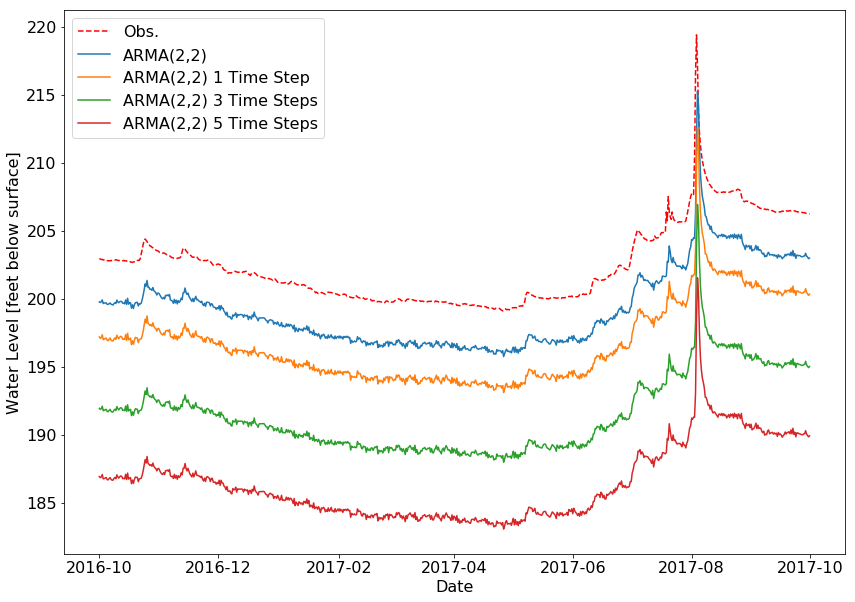

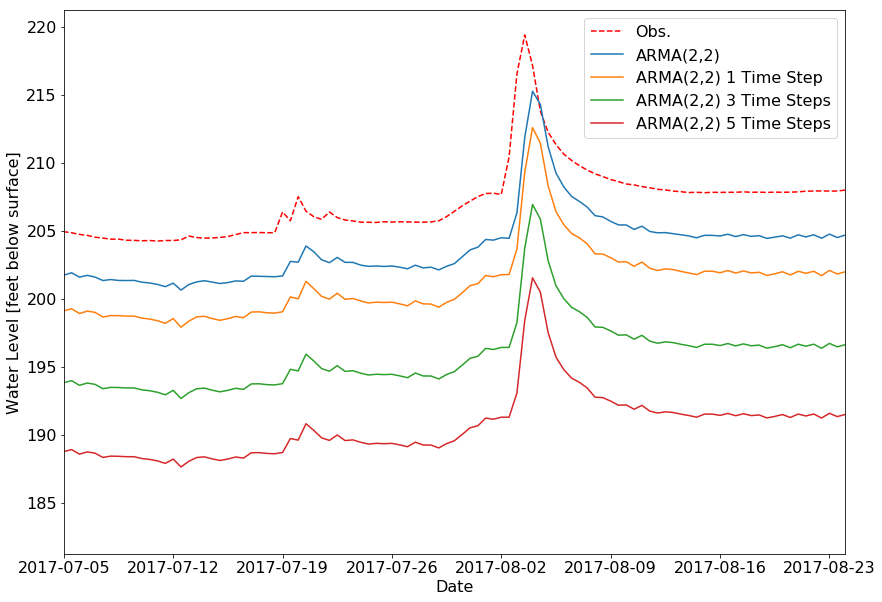

In [31]:
noise_std = 0.33   #assign noise based on the standard errod

#create training dataset
WLtrain = df_train['water_level(blsd)'].values
WLtrain = WLtrain.reshape(WLtrain.size,1)

#create test dataset
WLtest  = df_test['water_level(blsd)'].values
WLtest  = WLtest.reshape(WLtest.size,1)

DatesTest = df_test['SerDates'].values

#Compute t minus 1 array
WLttm1 = np.concatenate([WLtrain[-2:-1],WLtest[0:-1]])
WLttm1 = WLttm1.reshape(WLttm1.size,1)

#Compute t minues 2 array
WLttm2 = np.concatenate([WLtrain[-3:-1],WLtest[0:-2]])
WLttm2 = WLttm2.reshape(WLttm2.size,1)

#Compute eta terms
etatm1 = np.random.normal(0.0,noise_std,(len(WLttm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])

#assign eta of zero equal to the noise
etat = noise_std

#compute ARMA (2,2) parameters
ARMA22_mu     = WL_ARMA_2_2_model.params[0]
ARMA22_phi1   = WL_ARMA_2_2_model.params[1]
ARMA22_phi2   = WL_ARMA_2_2_model.params[2]
ARMA22_theta1 = WL_ARMA_2_2_model.params[3]
ARMA22_theta2 = WL_ARMA_2_2_model.params[4]




#Compute ARMA at Time Step 0
WLhatARMA22 = ARMA22_mu + ARMA22_phi1*WLttm1 + ARMA22_phi2*WLttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

#Compute ARMA at Time Step 1
WLhatARMA22tp1 = ARMA22_mu + ARMA22_phi1*WLhatARMA22 + ARMA22_phi2*WLttm1 - ARMA22_theta1*etat - ARMA22_theta2*etatm1

#Compute ARMA at Time Step 2 
WLhatARMA22tp2 =  ARMA22_mu + ARMA22_phi1*WLhatARMA22tp1 + ARMA22_phi2*WLhatARMA22 - ARMA22_theta1*0 - ARMA22_theta1*etat

#Compute ARMA at Time Step 3
WLhatARMA22tp3 = ARMA22_mu + ARMA22_phi1*WLhatARMA22tp2 + ARMA22_phi2*WLhatARMA22tp1 - ARMA22_theta1*0 - ARMA22_theta2*0

#Compute ARMA at Time Step 4
WLhatARMA22tp4 = ARMA22_mu + ARMA22_phi1*WLhatARMA22tp3 + ARMA22_phi2*WLhatARMA22tp2 - ARMA22_theta1*0 - ARMA22_theta2*0

#Compute ARMA at Time Step 5 
WLhatARMA22tp5 = ARMA22_mu + ARMA22_phi1*WLhatARMA22tp4 + ARMA22_phi2*WLhatARMA22tp3 - ARMA22_theta1*0 - ARMA22_theta2*0

#Plot ARMA (2,2) Models
plt.figure(figsize=(14,10))
plt.plot(DatesTest,WLtest,'r--')
plt.plot(DatesTest,WLhatARMA22)
plt.plot(DatesTest, WLhatARMA22tp1)
plt.plot(DatesTest, WLhatARMA22tp3)
plt.plot(DatesTest, WLhatARMA22tp5)
plt.ylabel('Water Level [feet below surface]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('Obs.','ARMA(2,2)','ARMA(2,2) 1 Time Step','ARMA(2,2) 3 Time Steps','ARMA(2,2) 5 Time Steps'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

#Zoom in on the same ARMA(2,2) plot
plt.figure(figsize=(14,10))
plt.plot(DatesTest,WLtest,'r--')
plt.plot(DatesTest,WLhatARMA22)
plt.plot(DatesTest, WLhatARMA22tp1)
plt.plot(DatesTest, WLhatARMA22tp3)
plt.plot(DatesTest, WLhatARMA22tp5)
plt.xlim([DatesTest[550],DatesTest[650]])
plt.ylabel('Water Level [feet below surface]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('Obs.','ARMA(2,2)','ARMA(2,2) 1 Time Step','ARMA(2,2) 3 Time Steps','ARMA(2,2) 5 Time Steps'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()


## Compare ARMA(2,2) Predictions with Observations

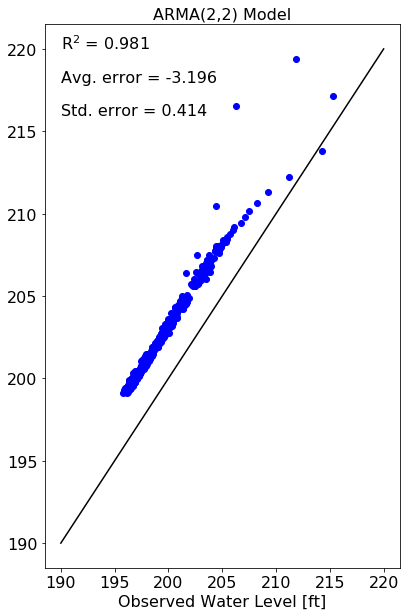

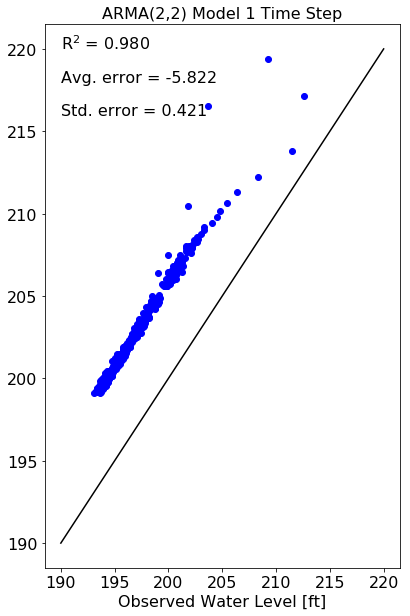

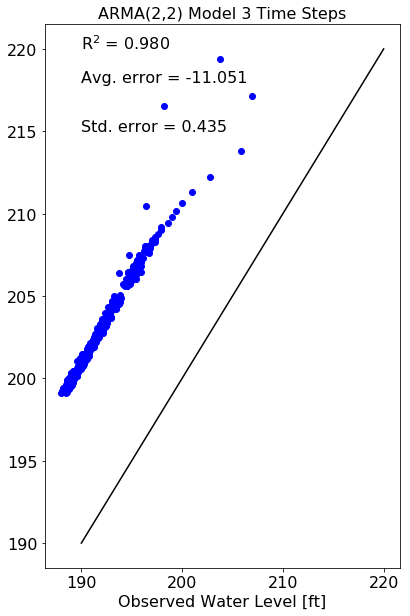

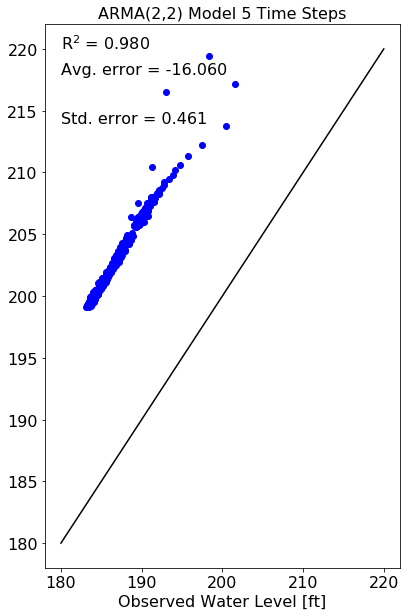

In [39]:
#ARMA(2,2) Models

#Zero Time Step
R2ARMA22  = np.corrcoef(WLhatARMA22.T,WLtest.T)**2
muARMA22  = np.mean(WLhatARMA22-WLtest)
stdARMA22 = np.std(WLhatARMA22-WLtest)

#1 Time Step
R2ARMA22_1 = np.corrcoef(WLhatARMA22tp1.T, WLtest.T)**2
muARMA22_1 = np.mean(WLhatARMA22tp1-WLtest)
stdARMA22_1 = np.std(WLhatARMA22tp1-WLtest)

#3 Time Steps
R2ARMA22_3 = np.corrcoef(WLhatARMA22tp3.T, WLtest.T)**2
muARMA22_3 = np.mean(WLhatARMA22tp3-WLtest)
stdARMA22_3 = np.std(WLhatARMA22tp3-WLtest)

#5 Time Steps
R2ARMA22_5 = np.corrcoef(WLhatARMA22tp5.T, WLtest.T)**2
muARMA22_5 = np.mean(WLhatARMA22tp5-WLtest)
stdARMA22_5 = np.std(WLhatARMA22tp5-WLtest)


# Plot the ARMA(2,2) Model Results
plt.figure(figsize=(14,10))
plt.subplot(122)
plt.plot(WLhatARMA22,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('ARMA(2,2) Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)           #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22, xy=(190,216), fontsize=16)
plt.show() #show plot

# 1 Time Step
plt.figure(figsize=(14,10))
plt.subplot(122)
plt.plot(WLhatARMA22tp1,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('ARMA(2,2) Model 1 Time Step',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)           #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_1[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_1, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_1, xy=(190,216), fontsize=16)
plt.show() #show plot

# 3 Time Steps
plt.figure(figsize=(14,10))
plt.subplot(122)
plt.plot(WLhatARMA22tp3,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('ARMA(2,2) Model 3 Time Steps',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)           #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_3[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_3, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_3, xy=(190,215), fontsize=16)
plt.show() #show plot

# 5 Time Steps
plt.figure(figsize=(14,10))
plt.subplot(122)
plt.plot(WLhatARMA22tp5,WLtest,'bo')
plt.plot([180, 220], [180, 220], 'k-')
plt.title('ARMA(2,2) Model 5 Time Steps',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)           #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2ARMA22_5[0,1], xy=(180,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muARMA22_5, xy=(180,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdARMA22_5, xy=(180,214), fontsize=16)
plt.show() #show plot

 ## Comments 

The R^2 values for the AR(2) Models are all relatively equal. This is what I would expect with groundwater data that was taken every 12 hours. Even at firve time steps ahead, you are only predicting two and a half days. Groundwater moves so slowly, that you would still expect these values to be highly correlated. The relationship between R^2 values is the same with the ARMA(2,2) models, although the R^2 value is lower than the AR(2) models.  

In general, the observed water levels are more smooth than AR(2) and the ARMA(2,2) models. The models lag the observed data and produce sequentially lower water levels that than the observed values. 